# Scraping and Preparing the Data

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

In [2]:
h_team = 'Atalanta'
a_team = 'Frosinone'
h_id = 300
a_id = 2732
competition_date = 'Serie A - January 15, 2024'

## Event data - first approach/method

In [3]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import pandas as pd
from pandas import json_normalize
import json
chrome_driver_path = r"C:\Users\Al Raven\anaconda3\Lib\site-packages\selenium\webdriver\chrome\chromedriver.exe"

In [4]:
#scraping code inspired by Varun Vasudevan (@TheDevilsDNA)
driver = webdriver.Chrome()
df1 = pd.DataFrame()
links = ['https://www.whoscored.com/Matches/1746241/Live/Italy-Serie-A-2023-2024-Atalanta-Frosinone']

wait = WebDriverWait(driver, 20)  # Increase time if needed

for i in links:    
    driver.get(i)
    
    # Close ad or accept cookies (replace with the actual element)
    try:
        close_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="some-button-id"]')))
        close_button.click()
    except:
        pass
    
    # Wait for the overlay to disappear (if it does so automatically)
    wait.until(EC.invisibility_of_element((By.ID, 'qc-cmp2-ui')))
    
    match_centre = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="sub-navigation"]/ul/li[4]/a')))
    match_centre.click()
    
    element = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/script[1]')))
    match_centre = driver.find_element("xpath",'//*[@id="sub-navigation"]/ul/li[4]/a')
    match_centre.click()
    element = driver.find_element("xpath",'//*[@id="layout-wrapper"]/script[1]')
    script_content = element.get_attribute('innerHTML')
    script_ls = script_content.split(sep="  ")
    script_ls = list(filter(None, script_ls))
    script_ls = [name for name in script_ls if name.strip()]
    dictstring = script_ls[2][17:-2]
    content = json.loads(dictstring)
    match = json_normalize(content['events'],sep='_')
    hometeam = content['home']['name']
    awayteam = content['away']['name']
    homeid = content['home']['teamId']
    awayid = content['away']['teamId']
    players = pd.DataFrame()
    homepl = json_normalize(content['home']['players'],sep='_')[['name', 'position', 'shirtNo', 'playerId']]
    awaypl = json_normalize(content['away']['players'],sep='_')[['name', 'position', 'shirtNo', 'playerId']]
    players = pd.concat([homepl,awaypl])
    match = match.merge(players, how='left')
    df1 = pd.concat([df1, match])
    #match_id += 1
    driver.close()

In [5]:
print(df1['qualifiers'].loc[df1.index[10]])

[{'type': {'value': 285, 'displayName': 'Defensive'}}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}, {'type': {'value': 233, 'displayName': 'OppositeRelatedEvent'}, 'value': '7'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}]


In [6]:
#listing columns
df1.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'qualifiers', 'satisfiedEventsTypes', 'isTouch',
       'period_value', 'period_displayName', 'type_value', 'type_displayName',
       'outcomeType_value', 'outcomeType_displayName', 'playerId', 'endX',
       'endY', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'isGoal', 'relatedEventId', 'relatedPlayerId', 'cardType_value',
       'cardType_displayName', 'name', 'position', 'shirtNo'],
      dtype='object')

In [7]:
#listing types of action ('type_displayName' column)
df1.type_displayName.unique()

array(['Start', 'Pass', 'BallTouch', 'BallRecovery', 'TakeOn', 'Tackle',
       'CornerAwarded', 'Clearance', 'Challenge', 'Aerial', 'SavedShot',
       'Save', 'Dispossessed', 'Foul', 'BlockedPass', 'PenaltyFaced',
       'Goal', 'Interception', 'KeeperSweeper', 'ShieldBallOpp',
       'MissedShots', 'OffsideGiven', 'OffsidePass', 'OffsideProvoked',
       'KeeperPickup', 'End', 'SubstitutionOff', 'SubstitutionOn',
       'FormationChange', 'Punch', 'Card', 'Error', 'FormationSet'],
      dtype=object)

In [8]:
#selecting all passes
df_passes = df1.loc[df1['type_displayName']=='Pass']
df_passes

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,goalMouthY,isShot,isGoal,relatedEventId,relatedPlayerId,cardType_value,cardType_displayName,name,position,shirtNo
2,2.636388e+09,3,0,0.0,300,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teun Koopmeiners,AMC,7.0
3,2.636388e+09,4,0,2.0,300,34.2,45.9,0,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 120, 128, 36, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Giorgio Scalvini,DC,42.0
4,2.636388e+09,3,0,5.0,2732,31.8,23.9,0,"[{'type': {'value': 3, 'displayName': 'HeadPas...","[91, 117, 30, 139, 35, 37, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matías Soulé,MR,18.0
5,2.636388e+09,4,0,7.0,2732,30.7,36.3,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 120, 29, 139, 36, 38, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enzo Barrenechea,DMC,45.0
8,2.636388e+09,6,0,14.0,2732,71.1,37.6,0,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 119, 117, 30, 205, 36, 38, 217, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walid Cheddira,FW,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,2.636417e+09,932,92,20.0,300,75.5,39.0,96,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 119, 117, 30, 205, 36, 38, 217, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Giorgio Scalvini,DC,42.0
1681,2.636417e+09,934,92,24.0,300,91.2,27.9,96,"[{'type': {'value': 2, 'displayName': 'Cross'}...","[91, 137, 124, 126, 35, 37, 217, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aleksey Miranchuk,Sub,59.0
1687,2.636417e+09,937,92,33.0,300,60.0,92.7,96,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 119, 117, 127, 205, 36, 38, 217, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marten de Roon,MC,15.0
1688,2.636417e+09,938,92,35.0,300,90.8,83.9,96,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 119, 123, 138, 125, 203, 40, 41, 35, 38, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teun Koopmeiners,AMC,7.0


In [9]:
#selecting all touches
df_touches = df1.loc[df1['type_displayName']=='BallTouch']
df_touches

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,goalMouthY,isShot,isGoal,relatedEventId,relatedPlayerId,cardType_value,cardType_displayName,name,position,shirtNo
6,2.636388e+09,5,0,9.0,300,46.8,65.4,0,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 69]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Berat Djimsiti,DC,19.0
15,2.636388e+09,18,0,59.0,2732,86.0,17.1,0,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 69]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marco Brescianini,MC,4.0
16,2.636388e+09,10,1,0.0,300,8.8,82.9,1,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 69]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marten de Roon,MC,15.0
46,2.636388e+09,31,2,22.0,300,59.2,2.7,2,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 69]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emil Holm,DMR,3.0
53,2.636388e+09,28,2,52.0,2732,48.0,95.5,2,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 69]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marco Brescianini,MC,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,2.636416e+09,917,89,15.0,2732,8.1,45.9,93,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 69]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Francesco Gelli,Sub,14.0
1647,2.636417e+09,941,89,54.0,300,97.3,52.2,93,"[{'type': {'value': 15, 'displayName': 'Head'}...",[91],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emil Holm,DMR,3.0
1648,2.636435e+09,962,89,55.0,2732,4.6,48.4,93,"[{'type': {'value': 15, 'displayName': 'Head'}...",[91],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Simone Romagnoli,Sub,6.0
1662,2.636417e+09,922,91,33.0,300,71.7,81.4,95,"[{'type': {'value': 56, 'displayName': 'Zone'}...",[91],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Luis Muriel,Sub,9.0


In [10]:
#selecting all shots ('isShot' column)
df_shots = df1.loc[df1['isShot']==True]
df_shots

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,goalMouthY,isShot,isGoal,relatedEventId,relatedPlayerId,cardType_value,cardType_displayName,name,position,shirtNo
24,2.636388e+09,15,1,11.0,2732,77.7,74.7,1,"[{'type': {'value': 147, 'displayName': 'Block...","[91, 10, 2, 5, 11, 12]",...,45.6,True,NaN,NaN,NaN,NaN,NaN,Abdou Harroui,ML,21.0
102,2.636389e+09,73,7,7.0,300,88.5,50.0,7,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 22, 9, 10, 202, 1, 13, 17, 26]",...,53.1,True,True,NaN,NaN,NaN,NaN,Teun Koopmeiners,AMC,7.0
197,2.636390e+09,139,12,12.0,300,93.3,49.5,12,"[{'type': {'value': 328, 'displayName': 'First...","[91, 24, 9, 10, 202, 1, 3, 12, 17, 19, 25]",...,49.3,True,True,NaN,NaN,NaN,NaN,Éderson,MC,13.0
220,2.636390e+09,146,13,42.0,300,86.0,65.9,13,"[{'type': {'value': 154, 'displayName': 'Inten...","[91, 24, 9, 10, 1, 3, 13, 17, 19, 26]",...,52.9,True,True,145.0,85070.0,NaN,NaN,Charles De Ketelaere,AMC,17.0
299,2.636392e+09,193,19,0.0,300,89.9,31.4,19,"[{'type': {'value': 102, 'displayName': 'GoalM...","[91, 7, 90, 10, 1, 3, 12]",...,61.7,True,NaN,192.0,302650.0,NaN,NaN,Teun Koopmeiners,AMC,7.0
393,2.636393e+09,247,23,29.0,300,90.5,50.9,23,"[{'type': {'value': 147, 'displayName': 'Block...","[91, 10, 201, 1, 3, 11, 12]",...,50.9,True,NaN,246.0,418579.0,NaN,NaN,Éderson,MC,13.0
425,2.636393e+09,271,24,17.0,300,87.2,46.0,24,"[{'type': {'value': 103, 'displayName': 'GoalM...","[91, 9, 10, 1, 3, 14]",...,46.4,True,NaN,270.0,343308.0,NaN,NaN,Gianluca Scamacca,FW,90.0
688,2.636399e+09,379,39,30.0,2732,88.5,34.2,39,"[{'type': {'value': 63, 'displayName': 'BoxRig...","[91, 9, 10, 1, 3, 12]",...,51.6,True,NaN,378.0,425079.0,NaN,NaN,Luca Mazzitelli,MC,36.0
704,2.636400e+09,406,40,48.0,300,84.5,69.9,40,"[{'type': {'value': 20, 'displayName': 'RightF...","[91, 7, 90, 10, 1, 3, 12]",...,41.3,True,NaN,405.0,386390.0,NaN,NaN,Matteo Ruggeri,DML,22.0
826,2.636402e+09,453,47,43.0,2732,88.6,36.5,47,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 7, 90, 10, 87, 1, 3, 12]",...,42.2,True,NaN,452.0,349895.0,NaN,NaN,Luca Mazzitelli,MC,36.0


In [11]:
#selecting all goals
df_goals = df1.loc[df1['type_displayName']=='Goal']
df_goals

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,goalMouthY,isShot,isGoal,relatedEventId,relatedPlayerId,cardType_value,cardType_displayName,name,position,shirtNo
102,2.636389e+09,73,7,7.0,300,88.5,50.0,7,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 22, 9, 10, 202, 1, 13, 17, 26]",...,53.1,True,True,NaN,NaN,NaN,NaN,Teun Koopmeiners,AMC,7.0
197,2.636390e+09,139,12,12.0,300,93.3,49.5,12,"[{'type': {'value': 328, 'displayName': 'First...","[91, 24, 9, 10, 202, 1, 3, 12, 17, 19, 25]",...,49.3,True,True,NaN,NaN,NaN,NaN,Éderson,MC,13.0
220,2.636390e+09,146,13,42.0,300,86.0,65.9,13,"[{'type': {'value': 154, 'displayName': 'Inten...","[91, 24, 9, 10, 1, 3, 13, 17, 19, 26]",...,52.9,True,True,145.0,85070.0,NaN,NaN,Charles De Ketelaere,AMC,17.0
1500,2.636415e+09,841,82,59.0,300,86.4,66.6,86,"[{'type': {'value': 55, 'displayName': 'Relate...","[91, 24, 9, 10, 1, 4, 12, 17, 20, 25]",...,47.3,True,True,840.0,129903.0,NaN,NaN,Davide Zappacosta,Sub,77.0
1649,2.636417e+09,915,89,56.0,300,98.2,51.7,93,"[{'type': {'value': 103, 'displayName': 'GoalM...","[91, 24, 9, 10, 202, 0, 5, 13, 16, 21, 26]",...,53.8,True,True,NaN,NaN,NaN,NaN,Emil Holm,DMR,3.0


In [12]:
df_goals.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'qualifiers', 'satisfiedEventsTypes', 'isTouch',
       'period_value', 'period_displayName', 'type_value', 'type_displayName',
       'outcomeType_value', 'outcomeType_displayName', 'playerId', 'endX',
       'endY', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'isGoal', 'relatedEventId', 'relatedPlayerId', 'cardType_value',
       'cardType_displayName', 'name', 'position', 'shirtNo'],
      dtype='object')

In [13]:
#selecting all defensive actions: 
df_defensive_actions = df1.loc[(df1.type_displayName=='Challenge') | (df1.type_displayName=='BallRecovery')| 
        (df1.type_displayName=='BlockedPass')|
        (df1.type_displayName=='Tackle')|
        (df1.type_displayName=='Interception')|
        (df1.type_displayName=='Foul')]
df_defensive_actions

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,goalMouthY,isShot,isGoal,relatedEventId,relatedPlayerId,cardType_value,cardType_displayName,name,position,shirtNo
7,2.636388e+09,5,0,12.0,2732,66.7,44.1,0,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walid Cheddira,FW,70.0
10,2.636388e+09,8,0,17.0,300,6.6,84.4,0,"[{'type': {'value': 285, 'displayName': 'Defen...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sead Kolasinac,DC,23.0
18,2.636388e+09,11,1,3.0,300,8.8,84.0,1,"[{'type': {'value': 233, 'displayName': 'Oppos...",[55],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marten de Roon,MC,15.0
29,2.636388e+09,18,1,52.0,300,30.2,15.1,1,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Éderson,MC,13.0
33,2.636388e+09,20,1,56.0,2732,37.4,80.4,1,"[{'type': {'value': 233, 'displayName': 'Oppos...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kevin Bonifazi,DC,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,2.636435e+09,954,92,20.0,300,74.3,32.9,96,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Giorgio Scalvini,DC,42.0
1680,2.636417e+09,943,92,21.0,2732,19.9,77.0,96,"[{'type': {'value': 285, 'displayName': 'Defen...",[55],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marco Brescianini,MC,4.0
1683,2.636417e+09,945,92,29.0,2732,29.1,20.3,96,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Farès Ghedjemis,Sub,29.0
1685,2.636417e+09,935,92,32.0,300,67.6,90.2,96,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marten de Roon,MC,15.0


## Event data - second approach/method

In [14]:
#scraping code and data prep inspired by Karol Działowski: https://www.dzialowski.eu/football-data-visualisations/
import re
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r',encoding="utf8")
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict, players_ids
#match_html_path = '.\Ivory Coast-Nigeria - Africa Cup of Nations 2023 Live.htm'
match_html_path = r"C:\Users\Al Raven\Documents\Football\WhoScored HTML match files\Atalanta 5-0 Frosinone - Serie A 2023_2024 Live.htm"
json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict, players_ids = extract_data_from_dict(data)

In [15]:
players_df.head()

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,383278,29,Marco Carnesecchi,GK,191,83,23,True,False,home,"{'totalSaves': {'39': 1.0, '49': 1.0, '61': 1....",NaN,NaN,NaN,NaN,NaN,NaN,300
1,100962,19,Berat Djimsiti,DC,190,83,30,True,False,home,"{'possession': {'3': 3.0, '4': 2.0, '8': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,300
2,110260,23,Sead Kolasinac,DC,183,85,30,True,False,home,"{'possession': {'2': 1.0, '3': 2.0, '4': 1.0, ...",454908.0,"{'value': 2, 'displayName': 'SecondHalf'}",57.0,NaN,NaN,NaN,300
3,405133,42,Giorgio Scalvini,DC,194,0,20,True,False,home,"{'possession': {'0': 1.0, '2': 2.0, '3': 3.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,300
4,418579,3,Emil Holm,DMR,191,83,23,True,True,home,"{'possession': {'1': 1.0, '4': 2.0, '8': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,300


In [16]:
players_df.columns

Index(['playerId', 'shirtNo', 'name', 'position', 'height', 'weight', 'age',
       'isFirstEleven', 'isManOfTheMatch', 'field', 'stats',
       'subbedInPlayerId', 'subbedOutPeriod', 'subbedOutExpandedMinute',
       'subbedInPeriod', 'subbedInExpandedMinute', 'subbedOutPlayerId',
       'teamId'],
      dtype='object')

In [17]:
#passes dataframe
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes
passes_df = get_passes_df(events_dict)
#this is for the passing network -> average pass locations and counts of passes between players, etc.
def get_passes_between_df(team_id, passes_df, players_df):
    # filter for only team
    passes_df = passes_df[passes_df["teamId"] == team_id]

    # add column with first eleven players only
    passes_df = passes_df.merge(players_df[["playerId", "isFirstEleven"]], on='playerId', how='left')
    # filter on first eleven column
    passes_df = passes_df[passes_df['isFirstEleven'] == True]

    # calculate mean positions for players
    average_locs_and_count_df = (passes_df.groupby('playerId')
                                 .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count_df.columns = ['x', 'y', 'count']
    average_locs_and_count_df = average_locs_and_count_df.merge(players_df[['playerId', 'name', 'shirtNo', 'position']],
                                                                on='playerId', how='left')
    average_locs_and_count_df = average_locs_and_count_df.set_index('playerId')

    # calculate the number of passes between each position (using min/ max so we get passes both ways)
    passes_player_ids_df = passes_df.loc[:, ['id', 'playerId', 'receiver', 'teamId']]
    passes_player_ids_df['pos_max'] = (passes_player_ids_df[['playerId', 'receiver']].max(axis='columns'))
    passes_player_ids_df['pos_min'] = (passes_player_ids_df[['playerId', 'receiver']].min(axis='columns'))

    # get passes between each player
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between_df.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    # add on the location of each player so we have the start and end positions of the lines
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_min', right_index=True)
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_max', right_index=True,
                                                suffixes=['', '_end'])
    return passes_between_df, average_locs_and_count_df
home_team_id = list(teams_dict.keys())[0]  # selected home team
home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(home_team_id, passes_df, players_df)
away_team_id = list(teams_dict.keys())[1]  # selected home team
away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(away_team_id, passes_df, players_df)

In [18]:
#home team's passes
h_passes = passes_df[passes_df['teamId']==h_id]
#home team's passes IN opponent's half
h_opphalf_passes = h_passes[h_passes['x']>=50]
#home team's passes in their own half
h_ownhalf_passes = h_passes[h_passes['x']<50]
#home team's passes INTO the final third
h_final_3rd_passes = h_passes[h_passes['endX']>=66]
h_final_3rd_passes = h_final_3rd_passes[h_final_3rd_passes['x']<=66]
#home team's completed passes into the final third
h_comp_final3rd_passes = h_final_3rd_passes[h_final_3rd_passes['outcomeType']=='Successful']
#home team's passes into the opponent's box
h_passes_intobox = h_passes[h_passes['endX']>=85]
h_passes_intobox = h_passes_intobox[h_passes_intobox['endY']<=80]
h_passes_intobox = h_passes_intobox[h_passes_intobox['endY']>=20]
#home team's COMPLETED/SUCCESSFUL passes into the opponent's box
h_comp_passes_intobox = h_passes_intobox[h_passes_intobox['outcomeType']=='Successful']

In [19]:
#Same pass dataframes for away team
a_passes = passes_df[passes_df['teamId']==a_id]
a_opphalf_passes = a_passes[a_passes['x']>=50]
a_ownhalf_passes = a_passes[a_passes['x']<50]
a_final_3rd_passes = a_passes[a_passes['endX']>=66]
a_final_3rd_passes = a_final_3rd_passes[a_final_3rd_passes['x']<=66]
a_comp_final3rd_passes = a_final_3rd_passes[a_final_3rd_passes['outcomeType']=='Successful']
a_passes_intobox = a_passes[a_passes['endX']>=85]
a_passes_intobox = a_passes_intobox[a_passes_intobox['endY']<=80]
a_passes_intobox = a_passes_intobox[a_passes_intobox['endY']>=20]
a_comp_passes_intobox = a_passes_intobox[a_passes_intobox['outcomeType']=='Successful']

In [20]:
#home team's shots
home_shots = df_shots[df_shots["teamId"] == h_id]

In [21]:
home_goals = home_shots[home_shots['isGoal']==True]
home_goals

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,goalMouthY,isShot,isGoal,relatedEventId,relatedPlayerId,cardType_value,cardType_displayName,name,position,shirtNo
102,2.636389e+09,73,7,7.0,300,88.5,50.0,7,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 22, 9, 10, 202, 1, 13, 17, 26]",...,53.1,True,True,NaN,NaN,NaN,NaN,Teun Koopmeiners,AMC,7.0
197,2.636390e+09,139,12,12.0,300,93.3,49.5,12,"[{'type': {'value': 328, 'displayName': 'First...","[91, 24, 9, 10, 202, 1, 3, 12, 17, 19, 25]",...,49.3,True,True,NaN,NaN,NaN,NaN,Éderson,MC,13.0
220,2.636390e+09,146,13,42.0,300,86.0,65.9,13,"[{'type': {'value': 154, 'displayName': 'Inten...","[91, 24, 9, 10, 1, 3, 13, 17, 19, 26]",...,52.9,True,True,145.0,85070.0,NaN,NaN,Charles De Ketelaere,AMC,17.0
1500,2.636415e+09,841,82,59.0,300,86.4,66.6,86,"[{'type': {'value': 55, 'displayName': 'Relate...","[91, 24, 9, 10, 1, 4, 12, 17, 20, 25]",...,47.3,True,True,840.0,129903.0,NaN,NaN,Davide Zappacosta,Sub,77.0
1649,2.636417e+09,915,89,56.0,300,98.2,51.7,93,"[{'type': {'value': 103, 'displayName': 'GoalM...","[91, 24, 9, 10, 202, 0, 5, 13, 16, 21, 26]",...,53.8,True,True,NaN,NaN,NaN,NaN,Emil Holm,DMR,3.0


In [22]:
#away team's shots
away_shots = df_shots[df_shots["teamId"] == a_id]
away_goals = away_shots[away_shots['isGoal']==True]

***Getting other match statistics***

I'm sure there is some way to get possession% without merely copying it manually, but I haven't found it yet...

In [23]:
h_poss = 47.7
a_poss = 52.3

- https://www.statsperform.com/resource/how-we-measure-pressure/
- https://www.statsperform.com/opta-event-definitions/

- Field Tilt = team final third passes / team and opponent final third passes
- Key passes = The final pass from a player to their teammate who then makes an attempt on Goal without scoring. ?????
- PPDA = Opponent passes allowed per defensive action, in the opponent’s defensive 3/5ths of the pitch
- Chances Created = A cumulative total of ‘Assists’ and ‘Key Passes’ 

Field Tilt = team final third passes / team and opponent final third passes

In [24]:
h_field_tilt = 100*round(len(h_final_3rd_passes)/(len(h_final_3rd_passes)+len(a_final_3rd_passes)),2)
h_field_tilt

52.0

In [25]:
a_field_tilt= 100*round(len(a_final_3rd_passes)/(len(h_final_3rd_passes)+len(a_final_3rd_passes)),2)
a_field_tilt

48.0

PPDA = Opponent passes allowed per defensive action, in the opponent’s half

In [26]:
defensive_actions_inopp = df_defensive_actions[df_defensive_actions['x']>50]
h_defensive_actions_inopp = defensive_actions_inopp[defensive_actions_inopp['teamId']==h_id]
a_defensive_actions_inopp = defensive_actions_inopp[defensive_actions_inopp['teamId']==a_id]
h_defensive_actions_inopp

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,goalMouthY,isShot,isGoal,relatedEventId,relatedPlayerId,cardType_value,cardType_displayName,name,position,shirtNo
49,2.636389e+09,72,2,48.0,300,63.2,12.8,2,"[{'type': {'value': 285, 'displayName': 'Defen...","[91, 142]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teun Koopmeiners,AMC,7.0
51,2.636388e+09,34,2,49.0,300,61.4,10.2,2,"[{'type': {'value': 233, 'displayName': 'Oppos...","[91, 142]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Giorgio Scalvini,DC,42.0
60,2.636388e+09,42,3,15.0,300,55.3,32.1,3,"[{'type': {'value': 13, 'displayName': 'Foul'}...","[91, 63]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gianluca Scamacca,FW,90.0
99,2.636389e+09,71,5,8.0,300,95.8,26.9,5,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 136, 63]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emil Holm,DMR,3.0
170,2.636390e+09,118,11,15.0,300,50.6,22.8,11,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 101, 56]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marten de Roon,MC,15.0
187,2.636390e+09,131,11,55.0,300,68.4,36.2,11,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 60]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Éderson,MC,13.0
190,2.636390e+09,133,11,58.0,300,53.7,54.2,11,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sead Kolasinac,DC,23.0
216,2.636390e+09,142,13,34.0,300,65.7,28.7,13,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gianluca Scamacca,FW,90.0
226,2.636391e+09,148,14,45.0,300,54.2,15.9,14,"[{'type': {'value': 286, 'displayName': 'Offen...","[91, 63]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Éderson,MC,13.0
242,2.636391e+09,158,15,52.0,300,69.4,8.9,15,"[{'type': {'value': 56, 'displayName': 'Zone'}...",[55],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teun Koopmeiners,AMC,7.0


In [27]:
h_PPDA = round(len(a_ownhalf_passes)/len(h_defensive_actions_inopp),1)
h_PPDA

7.3

In [28]:
a_PPDA = round(len(h_ownhalf_passes)/len(a_defensive_actions_inopp),1)
a_PPDA

9.1

***Calcuating xT (Expected Threat) - McKay Johns' method/tutorial***

https://github.com/mckayjohns/youtube-videos/blob/main/code/xT%20Tutorial.ipynb

In [29]:
import numpy as np

In [30]:
#Import xT Grid, turn it into an array, and then get how many rows and columns it has
xT = pd.read_csv("/Users/Al Raven/Documents/Football/xT_grid.csv", header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [31]:
xT # this is how our pitch is broken up

array([[0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
        0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
        0.03485072, 0.0379259 ],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138,

In [32]:
#Bin Data for xT

# We use a pandas method called .cut --> https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# We say labels=False because we want the integer locator of the bin
passes_df['x1_bin'] = pd.cut(passes_df['x'], bins=xT_cols, labels=False)
passes_df['y1_bin'] = pd.cut(passes_df['y'], bins=xT_rows, labels=False)
passes_df['x2_bin'] = pd.cut(passes_df['endX'], bins=xT_cols, labels=False)
passes_df['y2_bin'] = pd.cut(passes_df['endY'], bins=xT_rows, labels=False)

# Return Bin Values for xT
# We use a lambda function to assign the values from the bins to the x and y values with numpy array slicing
# it is going through each row and assigning the values based on where those numbers are in the numpy array
# kind of an advanced topic, so be sure to familiarize yourself with slicing and indexing
# its basically doing this: xT[4][5] where 4 is the fourth list and 5 is the fifth item in that list

passes_df['start_zone_value'] = passes_df[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
passes_df['end_zone_value'] = passes_df[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)



# now we find the difference between the start and end to get the xT value
passes_df['xT'] = passes_df['end_zone_value'] - passes_df['start_zone_value']

In [33]:
import matplotlib.pyplot as plt
import mplsoccer
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

## Pass networks

Pass network, based on Karol Działowski: https://www.dzialowski.eu/football-data-visualisations/

In [34]:
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, flipped=False):
    MAX_LINE_WIDTH = 20
    MAX_MARKER_SIZE = 1000
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max() *
                                  MAX_LINE_WIDTH)
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']
                                                / average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('black'))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='opta', pitch_color='#ead8cd')
    pitch.draw(ax=ax)

    if flipped:
        passes_between_df['x'] = pitch.dim.right - passes_between_df['x']
        passes_between_df['y'] = pitch.dim.right - passes_between_df['y']
        passes_between_df['x_end'] = pitch.dim.right - passes_between_df['x_end']
        passes_between_df['y_end'] = pitch.dim.right - passes_between_df['y_end']
        average_locs_and_count_df['x'] = pitch.dim.right - average_locs_and_count_df['x']
        average_locs_and_count_df['y'] = pitch.dim.right - average_locs_and_count_df['y']

    pass_lines = pitch.lines(passes_between_df.x, passes_between_df.y,
                             passes_between_df.x_end, passes_between_df.y_end, lw=passes_between_df.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count_df.x, average_locs_and_count_df.y,
                               s=average_locs_and_count_df.marker_size,
                               color='#FEFEFC', edgecolors='#000000', linewidth=1, alpha=1, ax=ax)
    for index, row in average_locs_and_count_df.iterrows():
        player_name = row["name"].split()
        player_initials = "".join(word[0] for word in player_name).upper()
        pitch.annotate(player_initials, xy=(row.x, row.y), c='#000000', va='center',
                       ha='center', size=10, ax=ax)

    return pitch

In [35]:
def pass_network_visualization2(ax, passes_between_df, average_locs_and_count_df, flipped=False):
    MAX_LINE_WIDTH = 20
    MAX_MARKER_SIZE = 1000
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max() *
                                  MAX_LINE_WIDTH)
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']
                                                / average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('#ff4d4d'))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='opta', pitch_color='#330000')
    pitch.draw(ax=ax)

    if flipped:
        passes_between_df['x'] = pitch.dim.right - passes_between_df['x']
        passes_between_df['y'] = pitch.dim.right - passes_between_df['y']
        passes_between_df['x_end'] = pitch.dim.right - passes_between_df['x_end']
        passes_between_df['y_end'] = pitch.dim.right - passes_between_df['y_end']
        average_locs_and_count_df['x'] = pitch.dim.right - average_locs_and_count_df['x']
        average_locs_and_count_df['y'] = pitch.dim.right - average_locs_and_count_df['y']

    pass_lines = pitch.lines(passes_between_df.x, passes_between_df.y,
                             passes_between_df.x_end, passes_between_df.y_end, lw=passes_between_df.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count_df.x, average_locs_and_count_df.y,
                               s=average_locs_and_count_df.marker_size,
                               color='#FEFEFC', edgecolors='#000000', linewidth=1, alpha=1, ax=ax)
    for index, row in average_locs_and_count_df.iterrows():
        player_name = row["name"].split()
        player_initials = "".join(word[0] for word in player_name).upper()
        pitch.annotate(player_initials, xy=(row.x, row.y), c='#000000', va='center',
                       ha='center', size=10, ax=ax)

    return pitch

## Expected Threat

In [36]:
passes_df['playerId'] = passes_df['playerId'].astype('string').str.split('.').str[0]
passes_df['playerId'] = passes_df['playerId'].map(players_ids)
passes_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT
2,2.636388e+09,50.0,50.0,33.1,45.4,300,Teun Koopmeiners,405133.0,Pass,Successful,5,3,3,3,0.014846,0.011324,-0.003522
3,2.636388e+09,34.2,45.9,66.2,80.9,300,Giorgio Scalvini,425079.0,Pass,Unsuccessful,3,3,7,6,0.011324,0.018703,0.007380
4,2.636388e+09,31.8,23.9,30.7,36.3,2732,Matías Soulé,456787.0,Pass,Successful,3,1,3,2,0.010595,0.011105,0.000510
5,2.636388e+09,30.7,36.3,53.3,36.0,2732,Enzo Barrenechea,100962.0,Pass,Unsuccessful,3,2,6,2,0.011105,0.016856,0.005751
8,2.636388e+09,71.1,37.6,79.1,19.4,2732,Walid Cheddira,425079.0,Pass,Successful,8,3,9,1,0.023851,0.029533,0.005681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,2.636417e+09,75.5,39.0,78.2,24.3,300,Giorgio Scalvini,129354.0,Pass,Successful,9,3,9,1,0.035113,0.029533,-0.005581
1681,2.636417e+09,91.2,27.9,86.9,59.1,300,Aleksey Miranchuk,472967.0,Pass,Unsuccessful,10,2,10,4,0.054911,0.108051,0.053140
1687,2.636417e+09,60.0,92.7,90.8,83.9,300,Marten de Roon,343308.0,Pass,Successful,7,7,10,6,0.017451,0.040670,0.023219
1688,2.636417e+09,90.8,83.9,87.9,51.5,300,Teun Koopmeiners,129903.0,Pass,Successful,10,6,10,4,0.040670,0.108051,0.067381


In [37]:
players = passes_df["playerId"].unique()
players

array(['Teun Koopmeiners', 'Giorgio Scalvini', 'Matías Soulé',
       'Enzo Barrenechea', 'Walid Cheddira', 'Luca Mazzitelli',
       'Marco Brescianini', 'Mateus Lusuardi', 'Emil Holm', 'Éderson',
       'Sead Kolasinac', 'Matteo Ruggeri', 'Marten de Roon',
       'Abdou Harroui', 'Berat Djimsiti', 'Marco Carnesecchi',
       'Caleb Okoli', 'Pol Lirola', 'Charles De Ketelaere',
       'Kevin Bonifazi', 'Stefano Turati', 'Gianluca Scamacca',
       'Farès Ghedjemis', 'Francesco Gelli', 'Simone Romagnoli',
       'Davide Zappacosta', 'Isak Hien', 'Luis Muriel',
       'Aleksey Miranchuk', 'Mehdi Bourabia', 'Mario Pasalic',
       'Arijon Ibrahimovic'], dtype=object)

In [38]:
xT_df = passes_df[['teamId','playerId','xT']].copy()

In [39]:
xT_df

,teamId,playerId,xT
2,300,Teun Koopmeiners,-0.003522
3,300,Giorgio Scalvini,0.007380
4,2732,Matías Soulé,0.000510
5,2732,Enzo Barrenechea,0.005751
8,2732,Walid Cheddira,0.005681
...,...,...,...
1678,300,Giorgio Scalvini,-0.005581
1681,300,Aleksey Miranchuk,0.053140
1687,300,Marten de Roon,0.023219
1688,300,Teun Koopmeiners,0.067381


In [40]:
xT_df2 = xT_df.copy()

In [41]:
xT_ranking = pd.DataFrame(xT_df2.groupby(['teamId','playerId'])['xT'].sum())
xT_ranking = xT_ranking.sort_values('xT',ascending=False)
xT_ranking

xT
teamId playerId                      
300    Aleksey Miranchuk     0.620868
       Teun Koopmeiners      0.548210
       Charles De Ketelaere  0.477918
       Matteo Ruggeri        0.467084
       Davide Zappacosta     0.383456
       Emil Holm             0.380150
2732   Luca Mazzitelli       0.332797
300    Giorgio Scalvini      0.305963
2732   Caleb Okoli           0.191420
300    Éderson               0.154269
       Marten de Roon        0.150992
2732   Marco Brescianini     0.130242
       Pol Lirola            0.129336
       Mehdi Bourabia        0.087179
       Enzo Barrenechea      0.082129
       Stefano Turati        0.082062
300    Berat Djimsiti        0.075027
2732   Mateus Lusuardi       0.060150
       Matías Soulé          0.052128
       Francesco Gelli       0.051837
300    Luis Muriel           0.041680
2732   Kevin Bonifazi        0.036121
300    Marco Carnesecchi     0.034407
       Gianluca Scamacca     0.030572
       Mario Pasalic         0.029708
       Sead Kolasinac        0.023079
2732   Abdou Harroui         0.020866
300    Isak Hien             0.005610
2732   Arijon Ibrahimovic    0.002990
       Simone Romagnoli     -0.008446
       Walid Cheddira       -0.014066
       Farès Ghedjemis      -0.018553

In [42]:
csv_data = xT_ranking.to_csv('xT_ranking.csv', index = True) 

In [43]:
xT = pd.read_csv('xT_ranking.csv')

In [44]:
xT = xT.sort_values(by=['xT'])
xT

,teamId,playerId,xT
31,2732,Farès Ghedjemis,-0.018553
30,2732,Walid Cheddira,-0.014066
29,2732,Simone Romagnoli,-0.008446
28,2732,Arijon Ibrahimovic,0.002990
27,300,Isak Hien,0.005610
26,2732,Abdou Harroui,0.020866
25,300,Sead Kolasinac,0.023079
24,300,Mario Pasalic,0.029708
23,300,Gianluca Scamacca,0.030572
22,300,Marco Carnesecchi,0.034407


In [45]:
#from tabulate import tabulate

# Putting it all together in a Dashboard

Text(0.98, 0.1, 'Data via Opta')

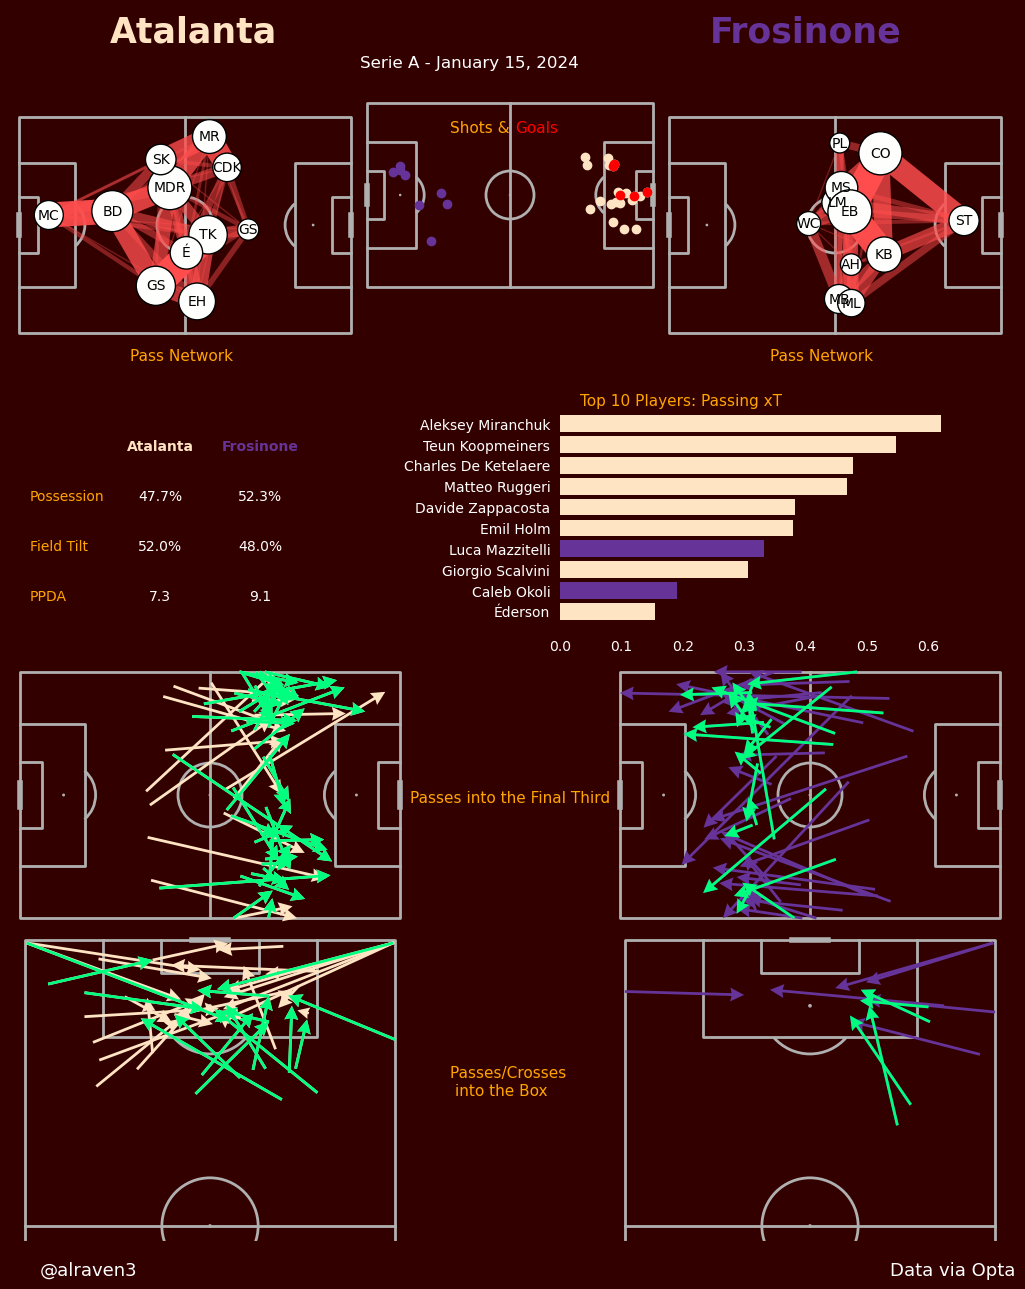

In [47]:
from highlight_text import HighlightText, ax_text, fig_text
from matplotlib.colors import to_rgba

background = '#330000'
text_color = 'white'
plot_title_color = 'orange'

# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(10,15))
ax.axis('off')
fig.set_facecolor(background)
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta',pitch_color=background)
pitch2 = mplsoccer.Pitch(pitch_type='opta',pitch_color=background)

ax1 = fig.add_axes((0.1, 0.65, 0.35, 0.3))
pass_network_visualization2(ax1,home_passes_between_df, home_average_locs_and_count_df)

ax2 = fig.add_axes((0.75, 0.65, 0.35, 0.3))
pass_network_visualization2(ax2, away_passes_between_df, away_average_locs_and_count_df, flipped=True)


ax3 = fig.add_axes((0.45, 0.62, 0.3, 0.4))
pitch2.draw(ax=ax3)
pitch2.scatter(home_shots.x,home_shots.y,color='bisque',ax=ax3)
pitch2.scatter(home_goals.x,home_goals.y,color='red',ax=ax3)
pitch2.scatter(pitch2.dim.right-away_shots.x,pitch2.dim.right-away_shots.y,color='rebeccapurple',ax=ax3)
pitch2.scatter(pitch2.dim.right-away_goals.x,pitch2.dim.right-away_goals.y,color='red',ax=ax3)

ax4 = fig.add_axes((0.1, 0.55, 0.3, 0.1))
ax4.set_facecolor(background)
match_stats = {
    'Metric': ['PPDA','Field Tilt','Possession'],
    h_team : [h_PPDA, str(h_field_tilt)+"%", str(h_poss)+"%"],
    a_team : [a_PPDA, str(a_field_tilt)+"%", str(a_poss)+"%"]
}
ncols = 3
nrows = 3
ax4.set_xlim(0, ncols)
ax4.set_ylim(0, nrows)
ax4.set_axis_off()
for y in range(0, nrows):
    ax4.annotate(
        xy=(0.2,y),
        text=match_stats['Metric'][y],
        ha='left',
        color=plot_title_color
    )
    ax4.annotate(
        xy=(1.5,y),
        text=match_stats[h_team][y],
        ha='center',
        color=text_color
    )
    ax4.annotate(
        xy=(2.5,y),
        text=match_stats[a_team][y],
        ha='center',
        color=text_color
    )
ax4.annotate(
    xy=(1.5, nrows),
    text=h_team,
    weight='bold',
    ha='center',
    color='bisque'
)
ax4.annotate(
    xy=(2.5, nrows),
    text=a_team,
    weight='bold',
    ha='center',
    color='rebeccapurple'
)

ax5 = fig.add_axes((0.65, 0.53, 0.4, 0.15))
ax5.set_facecolor(background)
ax5.tick_params(top=False, labeltop=False, bottom=False, labelbottom=True,colors=text_color)
ax5.tick_params(axis='y',left=False, colors=text_color) 
ax5.spines[['right', 'top','left','bottom']].set_visible(False)
colors = {h_id: 'bisque', a_id: 'rebeccapurple'}
top_players = xT.sort_values('xT', ascending=False).head(10)
top_colors = top_players['teamId'].map(colors)
plt.barh(top_players['playerId'], top_players['xT'], color=top_colors)
plt.gca().invert_yaxis() 

ax6 = fig.add_axes((0.1, 0.22, 0.4, 0.4))
pitch2.draw(ax=ax6)
pitch2.arrows(h_final_3rd_passes.x, h_final_3rd_passes.y,
             h_final_3rd_passes.endX, h_final_3rd_passes.endY, width=2,
             headwidth=5, headlength=5, color='bisque', ax=ax6)
pitch2.arrows(h_comp_final3rd_passes.x, h_comp_final3rd_passes.y,
             h_comp_final3rd_passes.endX, h_comp_final3rd_passes.endY, width=2,
             headwidth=5, headlength=5, color='springgreen', ax=ax6)

ax7 = fig.add_axes((0.7, 0.22, 0.4, 0.4))
pitch2.draw(ax=ax7)
pitch2.arrows(100-a_final_3rd_passes.x, 100-a_final_3rd_passes.y,
             100-a_final_3rd_passes.endX, 100-a_final_3rd_passes.endY, width=2,
             headwidth=5, headlength=5, color='rebeccapurple', ax=ax7)
pitch2.arrows(100-a_comp_final3rd_passes.x, 100-a_comp_final3rd_passes.y,
             100-a_comp_final3rd_passes.endX, 100-a_comp_final3rd_passes.endY, width=2,
             headwidth=5, headlength=5, color='springgreen', ax=ax7)

ax8 = fig.add_axes((0.1, 0.028, 0.4, 0.4))
pitch.draw(ax=ax8)
pitch.arrows(h_passes_intobox.x, h_passes_intobox.y,
             h_passes_intobox.endX, h_passes_intobox.endY, width=2,
             headwidth=5, headlength=5, color='bisque', ax=ax8)
pitch.arrows(h_comp_passes_intobox.x, h_comp_passes_intobox.y,
             h_comp_passes_intobox.endX, h_comp_passes_intobox.endY, width=2,
             headwidth=5, headlength=5, color='springgreen', ax=ax8)

ax9 = fig.add_axes((0.7, 0.028, 0.4, 0.4))
pitch.draw(ax=ax9)
pitch.arrows(a_passes_intobox.x, a_passes_intobox.y,
             a_passes_intobox.endX, a_passes_intobox.endY, width=2,
             headwidth=5, headlength=5, color='rebeccapurple', ax=ax9)
pitch.arrows(a_comp_passes_intobox.x, a_comp_passes_intobox.y,
             a_comp_passes_intobox.endX, a_comp_passes_intobox.endY, width=2,
             headwidth=5, headlength=5, color='springgreen', ax=ax9)

# ADDING TITLES AND INFO
fig_text(0.2,0.94,f"<{h_team}>",weight='heavy', size=25,highlight_textprops=[{'color':'bisque'}])
#fig_text(0.55,0.94,"4  -  3",weight='heavy', color=text_color,size=25)
fig_text(0.8,0.94,f"<{a_team}>",weight='heavy', size=25, highlight_textprops=[{"color": 'rebeccapurple'}])
fig.text(0.45,0.905,f"{competition_date}", color=text_color,size=12)
fig_text(0.54,0.87,'Shots &', color=plot_title_color, size=11)
fig_text(0.605,0.87,'Goals', color="red", size=11)
fig.text(0.22,0.71,'Pass Network', color=plot_title_color, size=11)
fig.text(0.86,0.71,'Pass Network', color=plot_title_color, size=11)
#fig.text(0.2,0.745,'Pass Network', color=plot_title_color, size=11)
#fig.text(0.9,0.745,'Pass Network', color=plot_title_color, size=11)
fig.text(0.67,0.68,'Top 10 Players: Passing xT', color=plot_title_color, size=11)
fig.text(0.5,0.415,'Passes into the Final Third', color=plot_title_color, size=11)
fig.text(0.54,0.22,'Passes/Crosses \n into the Box', color=plot_title_color, size=11)
fig.text(0.13,0.1,'@alraven3', color=text_color, size=13)
fig.text(0.98,0.1,'Data via Opta', color=text_color, size=13)

#plt.savefig("AR Dashboard 02 DARK.png")